# 생체 광학 데이터 AI 분석 

이권성, 손성우, 이정우

## 1. 배경
 빛을 응용한 뇌 내 성분 검사는 피부 상처 없이 다양한 성분 정보를 알 수 있습니다. 이는 뇌 활동 연구를 위해 신경영상을 얻을 수 있는 방법으로, 바늘(전극)을 찔러 넣는 방법인 뇌전도 검사를 대체할 방안으로 각광 받고 있습니다.




## 2. 목표
 신경영상 및 뇌 활동 검사를 위해 제공된 모의 시뮬레이션 데이터를 기반으로 하는 AI 알고리즘 개발



### 참고문헌

[1] Wabnitz, Heidrun, et al. "A time-domain NIR brain imager applied in functional stimulation experiments." European Conference on Biomedical Optics. Optical Society of America (2005)

[2] Perrey, Stéphane. "Non-invasive NIR spectroscopy of human brain function during exercise." Methods 45.4, 289-299 (2008)

[3] Golovynskyi, Sergii, et al. "Optical windows for head tissues in near‐infrared and short‐wave infrared regions: Approaching transcranial light applications." Journal of biophotonics 11.12, e201800141 (2018)

# 1. 데이터

#### 해결해야 하는 문제 광원, 측정 스펙트럼으로부터 뇌 내 성분 농도 산출


#### id : 구분자,  rho : 측정 거리 (단위: mm)
#### src : 광원 스펙트럼 (650 nm ~ 990 nm), dst : 측정 스펙트럼 (650 nm ~ 990 nm)
#### hhb : 디옥시헤모글로빈 농도, hbo2 : 옥시헤모글로빈 농도 (혈중 산소 포화도)
#### ca : 칼슘 농도, na : 나트륨 농도 (na-ca pump)

### 1. id : 구분자,  rho : 측정 거리 (단위: mm)

[1] Wabnitz, Heidrun, et al. "A time-domain NIR brain imager applied in functional stimulation experiments." European Conference on Biomedical Optics. Optical Society of America (2005)

![python image2](https://www.spiedigitallibrary.org/ContentImages/Journals/NEUROW/4/4/041411/WebImages/NPH_4_4_041411_f001.png)

![python image2](https://www.spiedigitallibrary.org/ContentImages/Journals/NEUROW/4/4/041411/WebImages/NPH_4_4_041411_f002.png)

### 2. src : 광원 스펙트럼 (650 nm ~ 990 nm), dst : 측정 스펙트럼 (650 nm ~ 990 nm)

![python image2](https://web-material3.yokogawa.com/10/4537/details/image_5872.jpg)

## 근적외선 분광법(NIR)

![python image2](https://www.azom.com/images/Article_Images/ImageForArticle_17511(1).png)

![python image2](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41467-019-09043-x/MediaObjects/41467_2019_9043_Fig1_HTML.png?as=webp)

### 3. hhb : 디옥시헤모글로빈 농도, hbo2 : 옥시헤모글로빈 농도 (혈중 산소 포화도)

![python image2](https://mblogthumb-phinf.pstatic.net/20130529_212/ling1134_1369838008652N7nvl_JPEG/respiratory_system27.png.jpg?type=w2)

![python image2](https://www.researchgate.net/profile/Walter_Karlen/publication/235387422/figure/fig1/AS:601800562462729@1520491843958/Quantum-efficiency-for-colored-pixels-of-a-high-end-RGB-CMOS-camera-sensor-Adapted-from.png)

### 4. ca : 칼슘 농도, na : 나트륨 농도 (na-ca pump)

![python image2](https://lh3.googleusercontent.com/proxy/gB5x9pJMSk8-xLeO1o8Ii0eZflHcrhSCjc-0Avlvm9WDDUuEsbDvLZM6GrNvnxTWUSaq7sWiNv9zrIRoBRjm5aHs8cdp2UyMMbtIRrU6r2rupOHm-6Hx99k8X0M5cxUPFjtD2mF6PfPwjGGEUc78t0zFHOFYgto)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
#from google.colab import files
#uploaded = files.upload()

In [29]:
#import io
#train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')), index_col=0)
#test = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')), index_col=0)
#submission = pd.read_csv(io.StringIO(uploaded['sample_submission.csv'].decode('utf-8')),index_col=0)
df = pd.read_csv('data/train.csv')
df.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42


# 2. 데이터 탐색

Text(0.5, 1.0, 'Na')

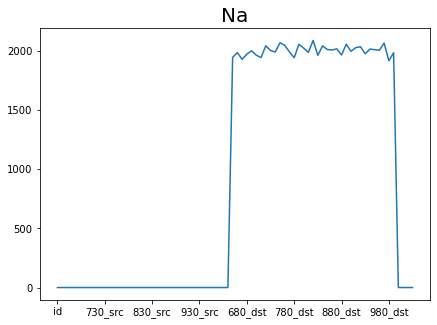

In [30]:
plt1=df.isna().sum().plot(kind='line',figsize=(7,5))
plt1.set_title('Na', fontsize=20)

Text(0.5, 1.0, 'X_Y_Correlation')

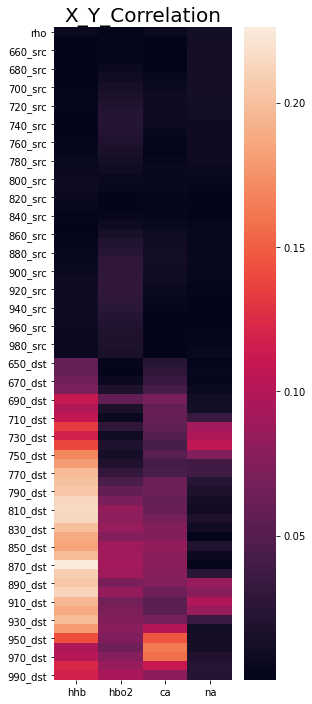

In [31]:
import seaborn as sns 
df1 = df.fillna(0)
plt.figure(figsize=(4, 12))
sns.heatmap(df.corr().loc['rho':'990_dst', 'hhb':].abs())
plt.title('X_Y_Correlation', fontsize=20)

## 다중 출력 문제 (종속 변수 상관성 확인)

Text(0.5, 1.0, 'Y_Correlation')

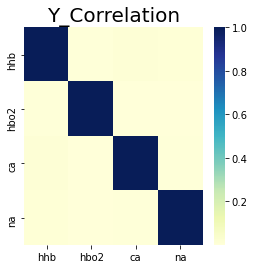

In [32]:
import seaborn as sns 
df1 = df.fillna(0)
plt.figure(figsize=(4, 4))
sns.heatmap(df1.corr().loc['hhb':, 'hhb':].abs(),cmap="YlGnBu")
plt.title('Y_Correlation', fontsize=20)

In [33]:
df1.corr().loc['hhb':, 'hhb':].abs()

,hhb,hbo2,ca,na
hhb,1.000000,0.005313,0.016263,0.009942
hbo2,0.005313,1.000000,0.002307,0.000726
ca,0.016263,0.002307,1.000000,0.005959
na,0.009942,0.000726,0.005959,1.000000


## 2.1. 광원 스펙트럼(_src)

    근적외선 파장의 빛을 뇌에 쪼임!
    결측치는 없다.
    파장마다 세기가 다르다!

Text(0.5, 1.0, '_src')

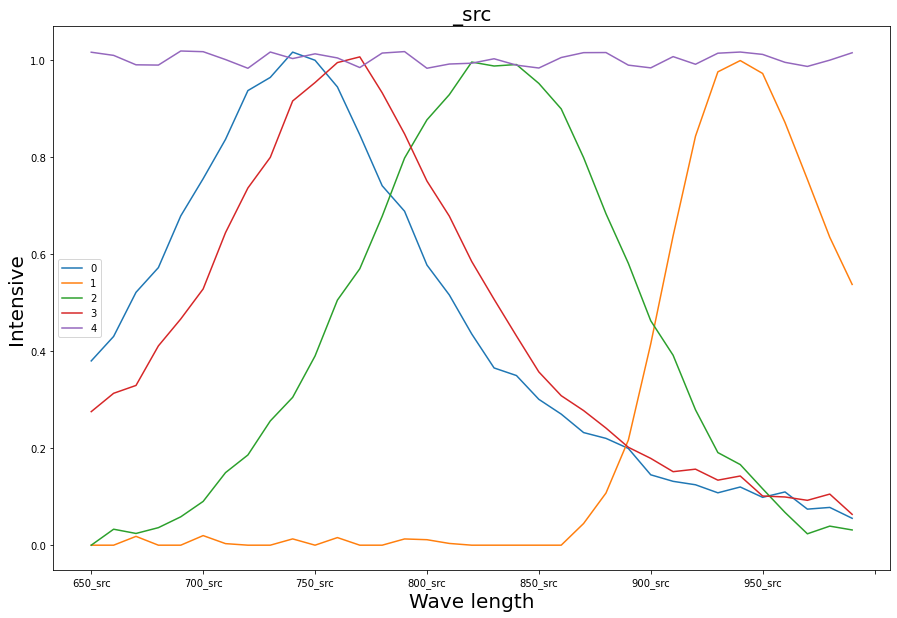

In [34]:
plt2=df.filter(regex='_src$',axis=1).head().T.plot(figsize=(15,10))
plt2.set_xlabel('Wave length',fontsize=20)
plt2.set_ylabel('Intensive',fontsize=20)
plt2.set_title('_src', fontsize=20)

## 2.2. 흡광 스펙트럼(_dst)

    빛을 쪼여서 나온 스펙트럼
    근적외선 영역중 어떤 파장의 빛의 세기가 약해졌는지 알 수 있다.

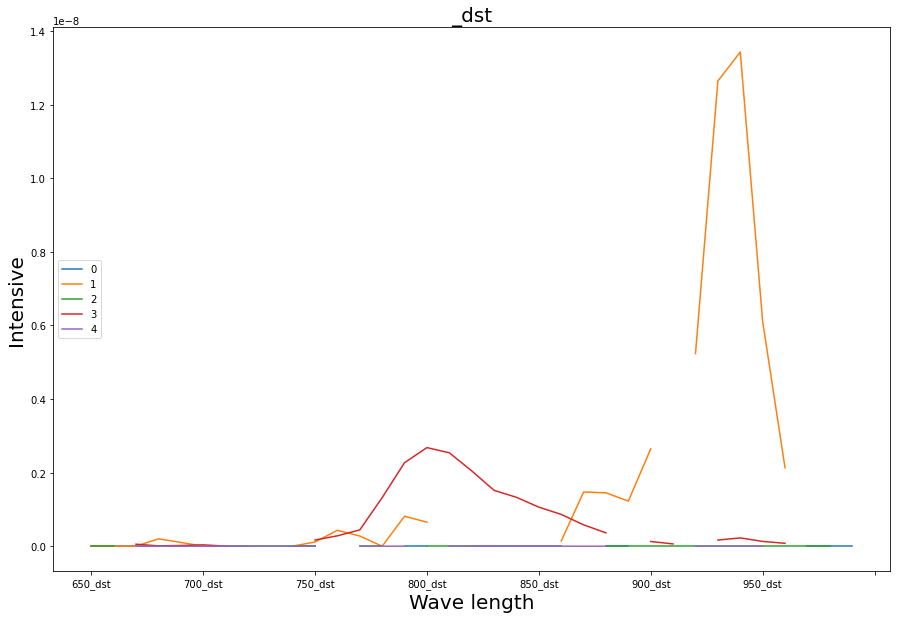

In [35]:
plt3=df.filter(regex='_dst$',axis=1).head().T.plot(figsize=(15,10))
plt3.set_xlabel('Wave length',fontsize=20)
plt3.set_ylabel('Intensive',fontsize=20)
plt3.set_title('_dst', fontsize=20)
plt3.legend(loc='center left')

# 3. 데이터 전처리

### 3.1 흡광 스펙트럼 선형 보간

In [36]:
df_dst = df.filter(regex='_dst$',axis=1)
df_dst = df_dst.interpolate(methods='linear', axis=0)

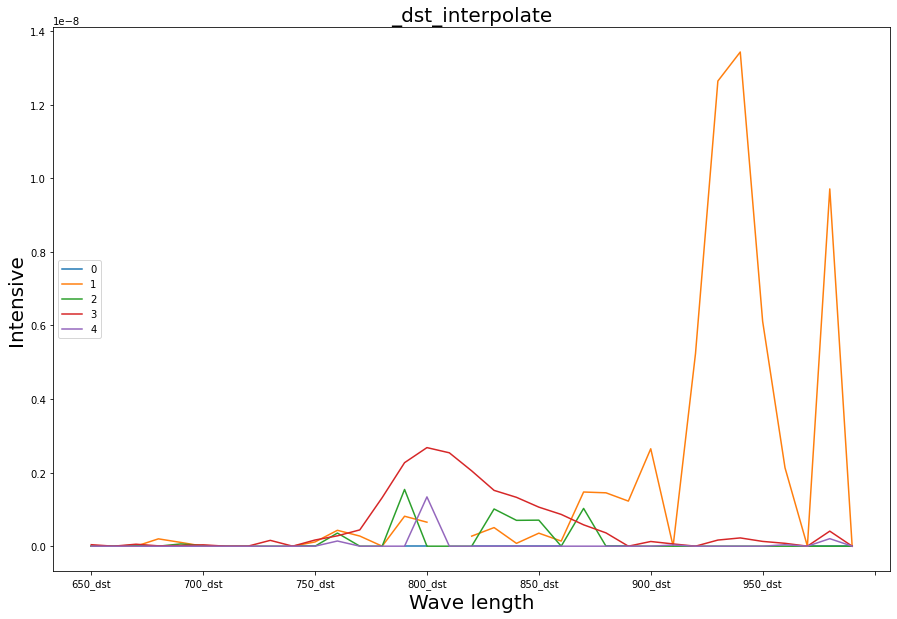

In [37]:
plt4 = df_dst.head().T.plot(figsize=(15,10))
plt4.set_xlabel('Wave length',fontsize=20)
plt4.set_ylabel('Intensive',fontsize=20)
plt4.set_title('_dst_interpolate', fontsize=20)
plt4.legend(loc='center left')

In [38]:
import numpy as np
df_dst=df_dst.replace(np.nan,0)

## 3.2. 흡광도(absorbance) 계산 ab=log(I0/I1)

![python image2](https://image.slidesharecdn.com/secondpptchobo-200811012731/95/ai-2-3-1024.jpg?cb=1597109266)

In [39]:
df_scr = df.filter(regex='_src$',axis=1)

In [40]:
df_scr.columns=np.arange(650,1000,10)

In [41]:
df_scr.head()

,650,660,670,680,690,700,710,720,730,740,...,900,910,920,930,940,950,960,970,980,990
0,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,0.96333,1.01541,...,0.14493,0.13150,0.12442,0.10786,0.11984,0.09851,0.10965,0.07424,0.07777,0.05536
1,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,0.00000,0.01295,...,0.41456,0.63716,0.84230,0.97480,0.99803,0.97146,0.87045,0.75330,0.63414,0.53699
2,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,0.25584,0.30445,...,0.46222,0.39113,0.27879,0.19070,0.16603,0.11617,0.06744,0.02343,0.03926,0.03136
3,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,0.79865,0.91482,...,0.17876,0.15139,0.15656,0.13392,0.14247,0.10126,0.09928,0.09239,0.10523,0.06349
4,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,1.01564,1.00216,...,0.98300,1.00616,0.99045,1.01321,1.01559,1.01072,0.99439,0.98597,0.99889,1.01412


In [42]:
df_dst.columns=np.arange(650,1000,10)

## 3.2.3 흡광도 계산(ab)을 위한 0값 처리하기

In [43]:
eps = np.finfo(float).eps

I1=df_dst
I0=df_scr 
rho=df['rho']

In [44]:
ab=(I0+eps)/(I1+eps)
for i,j in zip(ab.columns, range(len(rho))):
    ab[i]=ab[i].apply(lambda x : np.log(x)) / rho[j]

df_x=ab    
df_x.head()

,650,660,670,680,690,700,710,720,730,740,...,900,910,920,930,940,950,960,970,980,990
0,1.402552,3.519102,1.415647,3.545597,2.373801,1.430332,1.793214,1.439110,1.800315,1.442358,...,1.364486,1.359966,1.358382,2.254255,3.392206,1.349042,2.255546,1.671920,1.338520,3.296978
1,0.000000,0.000000,1.281339,-1.370871,-0.869517,1.284742,1.515108,0.000000,0.000000,1.267880,...,0.754762,1.423275,0.755863,1.210713,1.812370,0.755358,1.321876,1.787898,0.719785,3.521731
2,-0.000030,3.262890,0.824892,3.272219,1.379043,0.893184,1.706938,1.374383,1.733840,1.394137,...,1.410052,1.403944,1.390075,2.292440,3.424807,1.355638,2.223142,1.614496,1.312005,3.235287
3,0.905603,3.488138,0.901618,2.453137,1.595502,0.936139,1.371235,1.429447,1.117058,1.273718,...,0.842452,0.865166,1.224644,1.367079,2.026808,0.818952,1.397782,1.397816,0.774638,3.303478
4,1.227249,3.605228,1.441316,2.977791,2.404082,1.442394,1.493809,1.441027,1.802959,1.249969,...,1.441060,0.968653,1.271281,2.042409,2.957052,1.202924,1.597604,1.481623,0.892384,3.578278


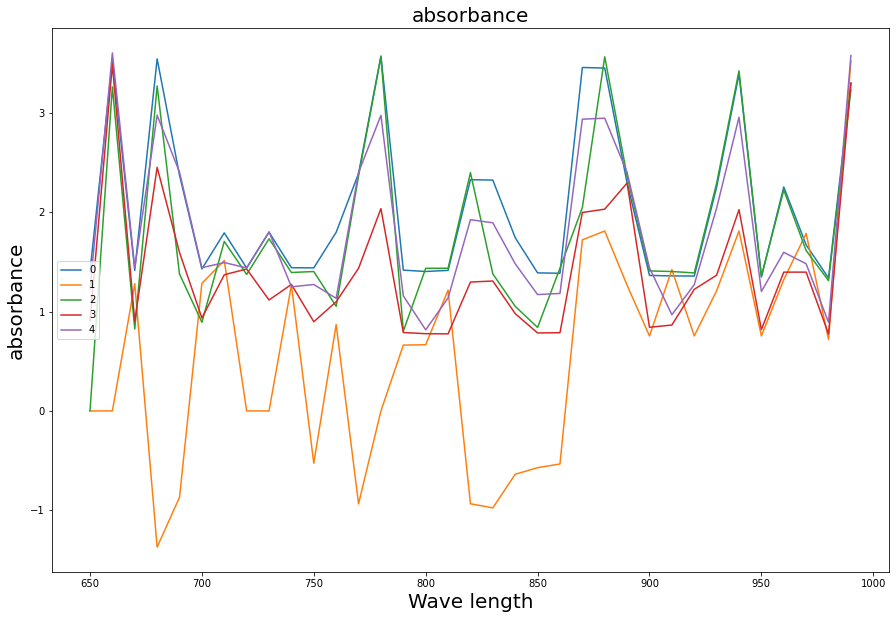

In [45]:
plt5=df_x.head().T.plot(figsize=(15,10))
plt5.set_xlabel('Wave length',fontsize=20)
plt5.set_ylabel('absorbance',fontsize=20)
plt5.set_title('absorbance', fontsize=20)
plt5.legend(loc='center left')

In [46]:
df1=pd.concat([df_x,df.loc[:,'hhb':'na']],axis=1)

Text(0.5, 1.0, 'Correlation After Feature Engineering')

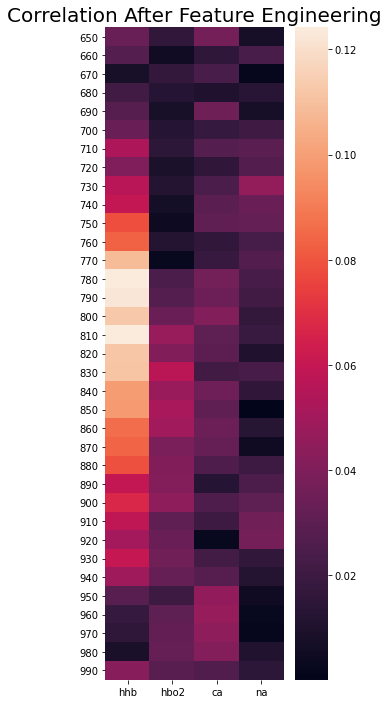

In [47]:
plt.figure(figsize=(4, 12))
sns.heatmap(df1.corr().iloc[:-4, -4:].abs())
plt.title('Correlation After Feature Engineering', fontsize=20)

# Train Set : Validation Set : Test Set = 8 : 1 : 1

서로 다른 모델간 평가를 위해 Validation Set 사용. 
모델 튜닝 시에는 훈련 세트를 이용 5겹 k-fold 실시 


In [48]:
train_x = df_x[:8000] #0~7999
train_y = df.loc[:8000-1,'hhb':'na']


validation_x = df_x[8000:9000]
validation_y = df.loc[8000:9000-1,'hhb':'na']

test_x = df_x[9000:]
test_y = df.loc[9000:,'hhb':'na']

# 4. 모델 구축 Linear Regression, RF, XGBoost, DNN


    1. Linear Regression
    흡광도와 농도는 선형적인 상관성이 있을 것으로 보임=>선형 회귀 실시
    다중 출력 회귀 모형 => 다변량 회귀
    다변량 회귀는 해석이 어려워 잘 사용하지 않음
    EDA과정중 종속병수 독립 확인 => 종속변수를 독립이라 가정하고 종속 변수별로 예측 모형을 구축

  



    2. RF, XGBoost, DNN
 
    변수간 교호 작용을 반영할 수 있고 일반화 성능이 안정적인 Random Forest, XGBOOST 실시
    또한 여러 종류의 원소가 여러 농도로 섞여 있으므로 새로운 패턴을 발견해야함=>DNN
    Feature selection은 필요하지 않음
    Scaling 또한 흡광도 계산시 scaling이 되었으므로 실시하지 않음


## 모델 평가 점수 Macro Average MAE 

    다중출력 회귀 모형의 평가를 위해 다중클래스 분류의 평가 방식인 Macro Average 도입
    macro avarage = 평균들의 평균

![python image2](https://interviewbubble.com/wp-content/uploads/2019/03/macro.png)

In [49]:
from sklearn.metrics import mean_absolute_error
def macro_average_mae(Y_true, Y_pred): 
    li=[]
    for i in range(0,4) :
        y_true = np.array(Y_true.iloc[:,i])
        y_pred = np.array(Y_pred.iloc[:,i])
        li.append(mean_absolute_error(y_true,y_pred))
    return np.mean(li),li

## Linear Regression

In [274]:
from sklearn import linear_model

In [275]:
pred_val=pd.DataFrame(columns=['hhb','hbo2','ca','na'])
pred_train=pd.DataFrame(columns=['hhb','hbo2','ca','na'])

for i in ['hhb','hbo2','ca','na']:
    li_reg = linear_model.LinearRegression()
    li_reg.fit(train_x,train_y[i])
    pred_train_y=li_reg.predict(train_x)
    pred_val_y=li_reg.predict(validation_x)
    pred_val[i]=pred_val_y
    pred_train[i]=pred_train_y

In [334]:
macro, raw = macro_average_mae(train_y,pred_train)
print("훈련 세트 성능 ", "macro average mae",macro)
raw_summary=pd.DataFrame(raw,index=['hhb','hbo2','ca','na']).T
raw_summary=raw_summary.append(validation_y.mean(),ignore_index=True)
raw_summary=raw_summary.append(validation_y.std(),ignore_index=True)
per=raw_summary.iloc[0,:]/raw_summary.iloc[1,:]*100
raw_summary=raw_summary.append(per,ignore_index=True)
raw_summary.index=['mae','mean','std','per']
raw_summary

훈련 세트 성능  macro average mae 1.7534480618824313


,hhb,hbo2,ca,na
mae,2.331321,0.791260,2.353729,1.537483
mean,7.920770,3.998320,8.953760,3.067830
std,3.015091,1.002869,3.107924,1.833294
per,29.433004,19.789821,26.287599,50.116297


In [415]:
macro, raw = macro_average_mae(validation_y,pred_val)
print("검증 세트 성능 ", "macro average mae",macro)
raw_summary=pd.DataFrame(raw,index=['hhb','hbo2','ca','na']).T
raw_summary=raw_summary.append(validation_y.mean(),ignore_index=True)
raw_summary=raw_summary.append(validation_y.std(),ignore_index=True)
per=raw_summary.iloc[0,:]/raw_summary.iloc[1,:]*100
raw_summary1=raw_summary.append(per,ignore_index=True)
raw_summary1.index=['mae','mean','std','per']
raw_summary1

검증 세트 성능  macro average mae 1.7769250727462764


,hhb,hbo2,ca,na
mae,2.336121,0.821846,2.497793,1.451940
mean,7.920770,3.998320,8.953760,3.067830
std,3.015091,1.002869,3.107924,1.833294
per,29.493607,20.554791,27.896584,47.327916


## RandomForest

In [349]:
from sklearn.ensemble import RandomForestRegressor

In [359]:
rf = RandomForestRegressor(random_state=42)

#### 하이퍼파라메터 튜닝 k-fold=5
 max_features=1~35

In [383]:
params = {"max_depth": [1,3,5,7],"max_features": [25,30,35], "min_samples_split": [1, 3, 10],
             "min_samples_leaf": [1, 3, 10]}

grid_search = GridSearchCV(estimator = rf, param_grid = params, cv=5, n_jobs=-1)

In [384]:
grid_search.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7],
                         'max_features': [25, 30, 35],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [1, 3, 10]})

In [385]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 35,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

#### validation score

In [386]:
rf_best=grid_search.best_estimator_
rf_best.fit(train_x,train_y)

pred_train=rf_best.predict(train_x)
pred_val=rf_best.predict(validation_x)

In [387]:
pred_train=pd.DataFrame(pred_train,columns=['hhb','hbo2','ca','na'])
pred_val=pd.DataFrame(pred_val,columns=['hhb','hbo2','ca','na'])

macro, raw = macro_average_mae(train_y,pred_train)
print("훈련 세트 성능 ", "macro average mae",macro)

raw_summary=pd.DataFrame(raw,index=['hhb','hbo2','ca','na']).T
raw_summary=raw_summary.append(validation_y.mean(),ignore_index=True)
raw_summary=raw_summary.append(validation_y.std(),ignore_index=True)
per=raw_summary.iloc[0,:]/raw_summary.iloc[1,:]*100
raw_summary=raw_summary.append(per,ignore_index=True)
raw_summary.index=['mae','mean','std','per']
raw_summary

훈련 세트 성능  macro average mae 1.530502704534944


,hhb,hbo2,ca,na
mae,1.751445,0.756739,2.130029,1.483798
mean,7.920770,3.998320,8.953760,3.067830
std,3.015091,1.002869,3.107924,1.833294
per,22.112051,18.926420,23.789217,48.366365


In [416]:
macro, raw = macro_average_mae(validation_y,pred_val)
print("검증 세트 성능 ", "macro average mae",macro)
raw_summary=pd.DataFrame(raw,index=['hhb','hbo2','ca','na']).T
raw_summary=raw_summary.append(validation_y.mean(),ignore_index=True)
raw_summary=raw_summary.append(validation_y.std(),ignore_index=True)
per=raw_summary.iloc[0,:]/raw_summary.iloc[1,:]*100
raw_summary2=raw_summary.append(per,ignore_index=True)
raw_summary2.index=['mae','mean','std','per']
raw_summary2

검증 세트 성능  macro average mae 1.7769250727462764


,hhb,hbo2,ca,na
mae,2.336121,0.821846,2.497793,1.451940
mean,7.920770,3.998320,8.953760,3.067830
std,3.015091,1.002869,3.107924,1.833294
per,29.493607,20.554791,27.896584,47.327916


### xgboost

#### 하이퍼 파라메터 튜닝

In [50]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_reg = xgb.XGBRegressor(random_state=42,booster='dart')

param_grid={'eta':[0.01,0.05,0.1],'max_depth':[3,5,10]}

g=GridSearchCV(cv=5,estimator=xgb_reg,param_grid=param_grid)

#### validation score

In [53]:
pred_val=pd.DataFrame(columns=['hhb','hbo2','ca','na'])
pred_train=pd.DataFrame(columns=['hhb','hbo2','ca','na'])
best_estimator=[]

for i in ['hhb','hbo2','ca','na']:
    g.fit(train_x,train_y[i])
    best_estimator.append(g.best_estimator_)
    g_best=g.best_estimator_
    
    pred_train_y=g_best.predict(train_x)
    pred_val_y=g_best.predict(validation_x)
    pred_val[i]=pred_val_y
    pred_train[i]=pred_train_y

[16:43:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[16:48:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[16:53:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:54:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:54:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:54:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:54:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [54]:
macro, raw = macro_average_mae(train_y,pred_train)
print("훈련 세트 성능 ", "macro average mae",macro)
raw_summary=pd.DataFrame(raw,index=['hhb','hbo2','ca','na']).T
raw_summary=raw_summary.append(validation_y.mean(),ignore_index=True)
raw_summary=raw_summary.append(validation_y.std(),ignore_index=True)
per=raw_summary.iloc[0,:]/raw_summary.iloc[1,:]*100
raw_summary=raw_summary.append(per,ignore_index=True)
raw_summary.index=['mae','mean','std','per']
raw_summary

훈련 세트 성능  macro average mae 0.7793047605242952


,hhb,hbo2,ca,na
mae,0.404765,0.601753,1.769632,0.341069
mean,7.920770,3.998320,8.953760,3.067830
std,3.015091,1.002869,3.107924,1.833294
per,5.110171,15.050150,19.764121,11.117599


In [56]:
macro, raw = macro_average_mae(validation_y,pred_val)
print("검증 세트 성능 ", "macro average mae",macro)
raw_summary=pd.DataFrame(raw,index=['hhb','hbo2','ca','na']).T
raw_summary=raw_summary.append(validation_y.mean(),ignore_index=True)
raw_summary=raw_summary.append(validation_y.std(),ignore_index=True)
per=raw_summary.iloc[0,:]/raw_summary.iloc[1,:]*100
raw_summary3=raw_summary.append(per,ignore_index=True)
raw_summary3.index=['mae','mean','std','per']
raw_summary3

검증 세트 성능  macro average mae 1.529477260091305


,hhb,hbo2,ca,na
mae,1.693192,0.768026,2.306941,1.349750
mean,7.920770,3.998320,8.953760,3.067830
std,3.015091,1.002869,3.107924,1.833294
per,21.376612,19.208726,25.765050,43.996886


## DNN

In [19]:
from tensorflow import keras

In [20]:
import tensorflow as tf
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[35]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(4))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [23]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [395]:
from sklearn.model_selection import GridSearchCV

param_distribs = {"n_hidden": [1, 2, 3],"n_neurons": [20,40,60,100]}

grid_search = GridSearchCV(estimator = keras_reg, param_grid = param_distribs, cv=5, n_jobs=-1)
grid_search.fit(ab,train.loc[:,'hhb':'na'],epochs=100,
               validation_data=(validation_x, validation_y),
               callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 60us/sample - loss: 6.9586 - val_loss: 6.2883
Epoch 2/100
10000/10000 [==============================] - 0s 32us/sample - loss: 5.9457 - val_loss: 6.0878
Epoch 3/100
10000/10000 [==============================] - 0s 31us/sample - loss: 5.7796 - val_loss: 5.8985
Epoch 4/100
10000/10000 [==============================] - 0s 32us/sample - loss: 5.7180 - val_loss: 5.9639
Epoch 5/100
10000/10000 [==============================] - 0s 32us/sample - loss: 5.6739 - val_loss: 5.9388
Epoch 6/100
10000/10000 [==============================] - 0s 31us/sample - loss: 5.6537 - val_loss: 5.8084
Epoch 7/100
10000/10000 [==============================] - 0s 32us/sample - loss: 5.6318 - val_loss: 5.9215
Epoch 8/100
10000/10000 [==============================] - 0s 32us/sample - loss: 5.6124 - val_loss: 5.7822
Epoch 9/100
10000/10000 [==============================] - 0s 33us/sample - loss: 5.593

Epoch 76/100
10000/10000 [==============================] - 0s 35us/sample - loss: 5.3045 - val_loss: 5.5125
Epoch 77/100
10000/10000 [==============================] - 1s 57us/sample - loss: 5.3027 - val_loss: 5.5431
Epoch 78/100
10000/10000 [==============================] - 0s 37us/sample - loss: 5.3003 - val_loss: 5.5325
Epoch 79/100
10000/10000 [==============================] - 0s 43us/sample - loss: 5.2951 - val_loss: 5.4849
Epoch 80/100
10000/10000 [==============================] - 0s 37us/sample - loss: 5.2905 - val_loss: 5.5026
Epoch 81/100
10000/10000 [==============================] - 0s 36us/sample - loss: 5.2978 - val_loss: 5.5519
Epoch 82/100
10000/10000 [==============================] - 0s 40us/sample - loss: 5.2959 - val_loss: 5.5164
Epoch 83/100
10000/10000 [==============================] - 0s 35us/sample - loss: 5.2958 - val_loss: 5.5856
Epoch 84/100
10000/10000 [==============================] - 0s 33us/sample - loss: 5.2884 - val_loss: 5.7643
Epoch 85/100
10000/

GridSearchCV(cv=5,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001ECBAF79288>,
             n_jobs=-1,
             param_grid={'n_hidden': [1, 2, 3], 'n_neurons': [20, 40, 60, 100]})

In [396]:
grid_search.best_params_

{'n_hidden': 2, 'n_neurons': 40}

In [397]:
best=grid_search.best_estimator_

#### validation_score

In [398]:
pred_train=best.predict(train_x)
pred_val=best.predict(validation_x)

In [399]:
pred_train=pd.DataFrame(pred_train,columns=['hhb','hbo2','ca','na'])
pred_val=pd.DataFrame(pred_val,columns=['hhb','hbo2','ca','na'])

macro, raw = macro_average_mae(train_y,pred_train)
print("훈련 세트 성능 ", "macro average mae",macro)

raw_summary=pd.DataFrame(raw,index=['hhb','hbo2','ca','na']).T
raw_summary=raw_summary.append(validation_y.mean(),ignore_index=True)
raw_summary=raw_summary.append(validation_y.std(),ignore_index=True)
per=raw_summary.iloc[0,:]/raw_summary.iloc[1,:]*100
raw_summary=raw_summary.append(per,ignore_index=True)
raw_summary.index=['mae','mean','std','per']
raw_summary

훈련 세트 성능  macro average mae 1.750213414144814


,hhb,hbo2,ca,na
mae,2.279991,0.801341,2.392250,1.527272
mean,7.920770,3.998320,8.953760,3.067830
std,3.015091,1.002869,3.107924,1.833294
per,28.784970,20.041935,26.717826,49.783451


In [418]:
macro, raw = macro_average_mae(validation_y,pred_val)
print("검증 세트 성능 ", "macro average mae",macro)
raw_summary=pd.DataFrame(raw,index=['hhb','hbo2','ca','na']).T
raw_summary=raw_summary.append(validation_y.mean(),ignore_index=True)
raw_summary=raw_summary.append(validation_y.std(),ignore_index=True)
per=raw_summary.iloc[0,:]/raw_summary.iloc[1,:]*100
raw_summary4=raw_summary.append(per,ignore_index=True)
raw_summary4.index=['mae','mean','std','per']
raw_summary4

검증 세트 성능  macro average mae 1.7769250727462764


,hhb,hbo2,ca,na
mae,2.336121,0.821846,2.497793,1.451940
mean,7.920770,3.998320,8.953760,3.067830
std,3.015091,1.002869,3.107924,1.833294
per,29.493607,20.554791,27.896584,47.327916


# 5. 최종 모형 평가

In [401]:
import matplotlib.pyplot as plt

In [57]:
dic={'linear Regression' : 1.7872267406463735,
'Random forest' : 1.622345250686469,
'Xgboost' : 1.529477260091305,
'Dnn' : 1.7769250727462764}

Text(0.5, 1.0, 'Model Evaluation')

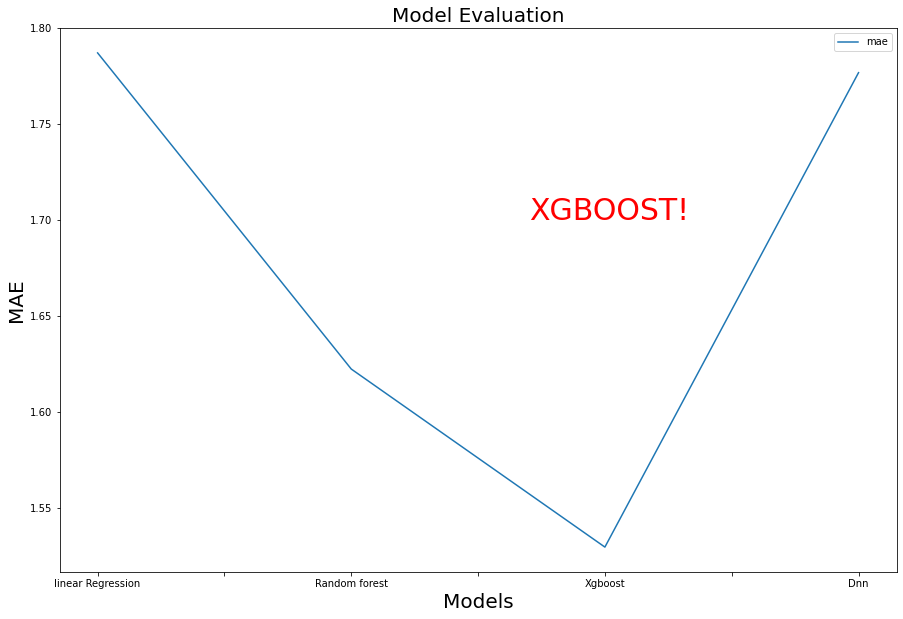

In [58]:
plt=pd.DataFrame(dic,index=['mae']).T.plot(kind='line',figsize=(15,10))
plt.set_xlabel('Models',fontsize=20)
plt.set_ylabel('MAE',fontsize=20)
plt.text(1.7,1.7,"XGBOOST!", fontsize=30, color="red")
plt.set_title('Model Evaluation', fontsize=20)

### 일반화 성능 추정 (테스트 세트)

     최종 선정된 Xgboost의 Best estimator의 일반화 성능 추정.
    Train과 valdation을 합쳐서 Fit한 후 Test set을 predict함

In [67]:
pred_test=pd.DataFrame(columns=['hhb','hbo2','ca','na'])
best_estimator

train_fin_x = df_x[:9000]
train_fin_y = df.loc[:9000-1,'hhb':'na']

j=0
for i in ['hhb','hbo2','ca','na']:
    best_est=best_estimator[j]
    best_est.fit(train_fin_x,train_fin_y[i])

    pred_test_y=best_est.predict(test_x)
    pred_test[i]=pred_test_y
    j+=1


macro, raw = macro_average_mae(test_y,pred_test)
print("테스트 세트 성능 ", "macro average mae",macro)
raw_summary=pd.DataFrame(raw,index=['hhb','hbo2','ca','na']).T
raw_summary=raw_summary.append(validation_y.mean(),ignore_index=True)
raw_summary=raw_summary.append(validation_y.std(),ignore_index=True)
per=raw_summary.iloc[0,:]/raw_summary.iloc[1,:]*100
raw_summary3=raw_summary.append(per,ignore_index=True)
raw_summary3.index=['mae','mean','std','per']
raw_summary3


[17:12:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
테스트 세트 성능  macro average mae 1.5112290833711624


,hhb,hbo2,ca,na
mae,1.662965,0.760148,2.231926,1.389877
mean,7.920770,3.998320,8.953760,3.067830
std,3.015091,1.002869,3.107924,1.833294
per,20.994992,19.011677,24.927254,45.304894


Text(0.5, 1.0, 'Final Model Evaluation')

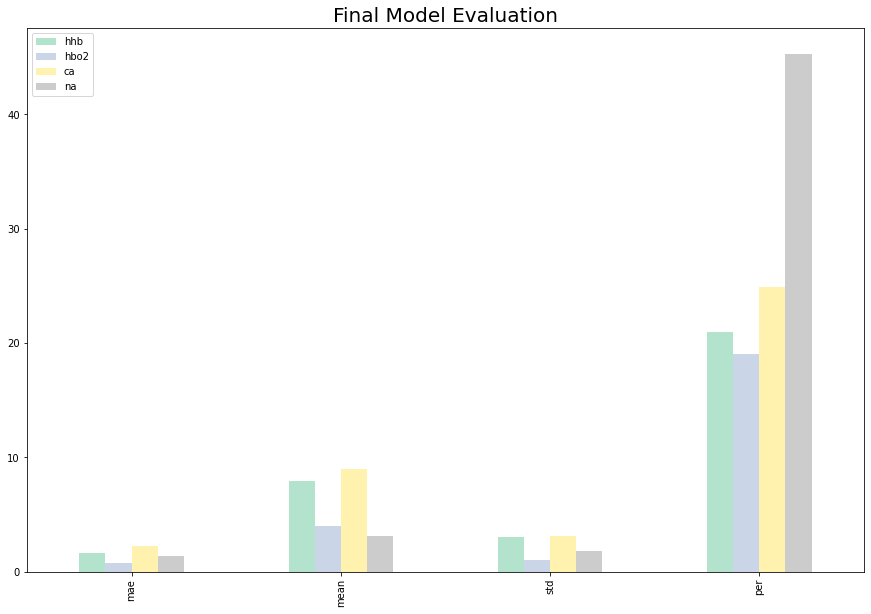

In [68]:
plt = raw_summary3.plot(kind='bar',figsize=(15,10),colormap='Pastel2')
plt.set_title('Final Model Evaluation', fontsize=20)